In [109]:
#-*- coding: utf-8 -*-
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

def doDCT_triUL(grid_DCT):
    grid_DCT=grid_DCT[:,::-1]
    grid_DCT=np.triu(grid_DCT)
    grid_DCT=grid_DCT[:,::-1]
    return grid_DCT
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
#np.triu(np.rot90(a))
a=doDCT_triUL(a)
a

# a=a[:,::-1]
# a=np.triu(a)
# a=a[:,::-1]
# a

array([[1, 2, 3],
       [4, 5, 0],
       [7, 0, 0]])

In [73]:
def KLT(cov, g):
#     val,vec = np.linalg.eig(np.cov(a))
    
    eigenValues,eigenVectors = np.linalg.eig(cov)

    k=8
    idx = eigenValues.argsort()[-k:][::-1]
#     idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    g_prime = np.zeros(cov.shape, dtype=np.float)    
    g_prime[:eigenVectors.shape[0],:eigenVectors.shape[1]] = eigenVectors
    
#     klt = np.dot(eigenVectors,a-a.mean())
    klt = np.dot(g_prime,g-g.mean())
    return klt,g_prime,eigenValues

# a = np.array([g_stacked]).T
a = np.array([[3,2,8]]).T
b = a.T
# b = [4,7,2,5]
c = a*b

print a
b.shape

print c.shape
# val,vec = np.linalg.eig(np.cov(c))


kk,m,val = KLT(a*b, a)
print kk.shape
print m
# print np.dot(kk.T,m).T
print val

# x = np.vstack([g_stacked,g_stacked.T])
# cov = np.cov(g_stacked)
# cov





[[3]
 [2]
 [8]]
(3, 3)
(3, 1)
[[ 0.34188173  0.         -0.93974299]
 [ 0.22792115 -0.9701425   0.0829185 ]
 [ 0.91168461  0.24253563  0.331674  ]]
[ 77.   0.   0.]


In [130]:
def KLT(cov, g):
    
    eigenValues,eigenVectors = np.linalg.eig(cov)
# 내림차순으로 소팅을 하여 가장 큰 8개를 추출 합니다.
    k=8
    idx = eigenValues.argsort()[-k:][::-1]
#     idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

# 가장 큰 8개의 EigenVector 외에는 zero column 벡터로 padding 합니다. 매트릭스 연산의 dimension 일치를 위해서입니다.

    eigenVectors_trimmed = np.zeros(cov.shape, dtype=np.float)   
    eigenVectors_trimmed[:eigenVectors.shape[0],:eigenVectors.shape[1]] = eigenVectors
    
#     klt = np.dot(eigenVectors,a-a.mean())
    g_prime = np.dot(eigenVectors_trimmed,g-g.mean())
#     print eigenVectors_trimmed.shape
#     return klt,g_prime,eigenValues
    return g_prime, eigenVectors_trimmed

C:\Users\ATIV5\Miniconda2\envs\py27\lib\site-packages\ipykernel\__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


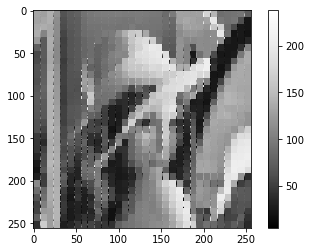

In [131]:
import scipy.misc
windowsize_r = 8
windowsize_c = 8

window = np.zeros((256, 256))
window = np.zeros((256, 256), dtype=np.float)

g_stacked = np.zeros((64,1), dtype=np.uint8)
g_tilda = np.zeros((64,1), dtype=np.uint8)


grid = np.zeros((8,8), dtype=np.uint8)
# grid_klt = np.zeros((8,8))

klt_transformed = np.zeros((64,1), dtype=np.float)
eigenVectors_trimmed = np.zeros((64,64), dtype=np.float) 

img = cv2.imread('lena-256x256.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for r in range(0,gray.shape[0], windowsize_r):
    for c in range(0,gray.shape[0], windowsize_c):
        grid = gray[r:r+windowsize_r,c:c+windowsize_c]

        g_stacked = grid.flatten()
            
        a = np.array([g_stacked]).T
        b = a.T
        klt_transformed, eigenVectors_trimmed = KLT(a*b, a)
#         grid_klt=np.reshape(klt_transformed, (8, 8)).T
#         window[r:r+windowsize_r,c:c+windowsize_c] = grid_klt

# approximated 된 이미지 g_tilda를 얻습니다.
        g_tilda = np.dot(eigenVectors_trimmed.T, klt_transformed) + a.mean()

# g_tilda 에 64개의 데이터들을 앞에서 8개씩 끊어서 열벡터로 stack 합니다.
        window[r:r+windowsize_r,c:c+windowsize_c] = np.reshape(g_tilda, (8,8)).T
#         if r == 0 and c == 0:
#             print(window[r:r+windowsize_r,c:c+windowsize_c])
    
        
plt.imsave('outfile_klt.png', window[:,:], cmap=plt.cm.gray)
plt.imshow(window, cmap = cm.Greys_r)
plt.colorbar()

plt.show()

In [ ]:
def iDCT(grid):
    return np.dot(np.dot(D.T, grid), D)

# def undoDCT(grid):
#     Di=np.linalg.inv(D)
#     return np.dot(np.dot(Di, grid), Di.T)


# img = mpimg.imread('outfile_dct.bmp')
img = cv2.imread('outfile_klt.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

# window = np.zeros((256, 256))
window = np.zeros((256, 256), dtype=np.uint8)

for r in range(0,gray.shape[0], windowsize_r):
    for c in range(0,gray.shape[0], windowsize_c):
        grid = gray[r:r+windowsize_r,c:c+windowsize_c]
        window[r:r+windowsize_r,c:c+windowsize_c] = iDCT(grid)        

# scipy.misc.imsave('outfile.bmp', window)
# plt.imshow(window, cmap = cm.Greys_r)

plt.imsave('outfile_klt_approx.png', window[:,:], cmap=plt.cm.gray)
plt.imshow(window, cmap = cm.Greys_r)
plt.colorbar()

plt.show()


In [98]:
a = np.array([[1,2,3,4,5,6,7,8,9]]).T
print(a.shape)
np.reshape(a, (3, 3)).T

(9, 1)


array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [139]:
num = 10
x = np.random.random(num) # Observation locations
x

array([ 0.017,  0.196,  0.125,  0.566,  0.691,  0.075,  0.904,  0.355,
        0.471,  0.094])

In [179]:
# "Green's functions" for a second-order polynomial
# at our observed locations
A = np.hstack([x**i for i in range(3)])
A.shape

(30,)